In [1]:
VISDRONE_TRAIN_ANNOT_DIR = '/APL/Datasets/VisDrone2019/VisDrone2019-DET-train/annotations/'

In [26]:
import pandas as pd
import os
import glob
import json
from pycocotools import cocoeval

In [3]:
all_files = glob.glob(os.path.join(VISDRONE_TRAIN_ANNOT_DIR, "*.txt"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, names=['x','y','w','h','score','category','truncation','occlusion']) for f in all_files)

In [4]:
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [18]:
scoreiszero = concatenated_df.loc[concatenated_df['score'] == 0]

In [25]:
scoreiszero.loc[scoreiszero['category'] == 11]

,x,y,w,h,score,category,truncation,occlusion
161,0,263,95,60,0,11,1,0.0
582,560,904,69,46,0,11,0,0.0
588,573,561,34,77,0,11,0,0.0
624,732,652,23,18,0,11,0,0.0
670,1477,0,99,64,0,11,1,1.0
817,519,574,42,56,0,11,0,0.0
818,823,532,61,46,0,11,0,0.0
1137,943,105,18,19,0,11,0,2.0
1213,482,234,18,35,0,11,0,0.0
1872,1210,160,24,18,0,11,0,1.0


## View VisDrone data using COCO API

In [27]:
coco_format_train = os.path.join(VISDRONE_TRAIN_ANNOT_DIR, 'train.json')

with open(coco_format_train) as f:
    annotation = json.load(f)

annotation

{'info': {'description': 'VisDrone dataset',
  'url': 'http://www.aiskyeye.com/',
  'version': '1.0',
  'year': 2019,
  'contributor': 'VisDrone authors, this format: Michael Smith @McGill University',
  'date_created': '2019/06/25'},
 'images': [{'file_name': '9999999_00115_d_0000042.jpg',
   'height': 1500,
   'width': 2000,
   'id': 9999999001150000042},
  {'file_name': '9999981_00000_d_0000040.jpg',
   'height': 1050,
   'width': 1400,
   'id': 9999981000000000040},
  {'file_name': '0000361_04509_d_0000776.jpg',
   'height': 765,
   'width': 1360,
   'id': 361045090000776},
  {'file_name': '9999962_00000_d_0000079.jpg',
   'height': 1050,
   'width': 1400,
   'id': 9999962000000000079},
  {'file_name': '0000239_11620_d_0000029.jpg',
   'height': 540,
   'width': 960,
   'id': 239116200000029},
  {'file_name': '9999937_00000_d_0000047.jpg',
   'height': 1078,
   'width': 1916,
   'id': 9999937000000000047},
  {'file_name': '9999955_00000_d_0000376.jpg',
   'height': 788,
   'width':

In [44]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)

In [34]:
dataDir='/APL/Datasets/VisDrone2019/VisDrone2019-DET-train'
dataType='train'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [35]:
annFile

'/APL/Datasets/VisDrone2019/VisDrone2019-DET-train/annotations/train.json'

In [36]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.50s)
creating index...
index created!


In [38]:
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [40]:
img

{'file_name': '9999982_00000_d_0000086.jpg',
 'height': 1050,
 'width': 1400,
 'id': 9999982000000000086}

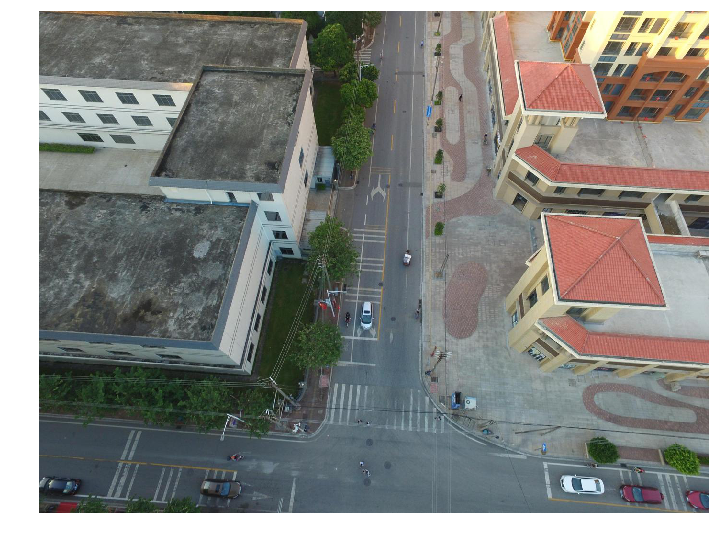

In [45]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(os.path.join(dataDir, 'images', img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

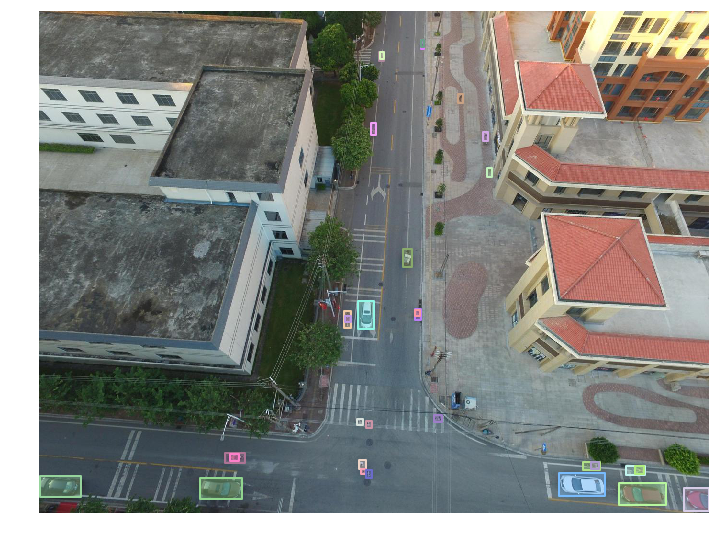

In [46]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)